In [9]:
import pandas as pd
import numpy as np
from plot import ov_plot as plot
from numba import njit
from time import time

In [4]:
@njit
def train_step(lr, n_iters, x_train, y_train, x_test, y_test):
    w, b = 0.0, 0.0
    history = np.zeros(n_iters // 1000 + 1)
    idx = 0
    n = x_train.size

    for i in range(n_iters):
        # Logging
        y_pred = w * x_train + b
        error = y_pred - y_train

        if i % 1000 == 0 or i == n_iters - 1:
            cost = 0.5 * np.dot(error, error) / n
            history[idx] = cost
            idx += 1

        dw = np.dot(error, x_train)
        db = np.sum(error)

        w -= lr * dw / n
        b -= lr * db / n
    
    return w, b, history

In [5]:
def train(lr, n_iters, x_train, y_train, x_test, y_test):
    w, b, history = train_step(lr, n_iters, x_train, y_train, x_test, y_test)
    for i, cost in enumerate(history):
        print(f"Iteration: {i * 1000}, Cost: {cost}")
    
    return w, b

In [6]:
# Sqaured Error Cost Function
@njit
def sec(X, Y, w, b):
    y_pred = w * X + b
    error = y_pred - Y
    cost = (1 / (2 * X.size)) * np.sum(error ** 2)
    return cost

In [17]:
def predict(lr, n_iters, x_train, y_train, x_test, y_test):
    st = time()
    w, b = train(lr, n_iters, x_train, y_train, x_test, y_test)
    test_cost = sec(x_test, y_test, w, b)
    train_cost = sec(x_train, y_train, w, b)
    ed = time()
    print("Train Cost = ", train_cost)
    print("Test Cost = ", test_cost)
    print(f"(w, b) = ({w:.4f}, {b:.4f})")
    print(f"time: {(ed - st):.4f}")
    plot(w, b, test_cost)

Iteration: 0, Cost: 787.8749391727494
Train Cost =  76.59857978197859
Test Cost =  88.3562597478518
(w, b) = (-10.5171, 41.7913)
time: 0.0009


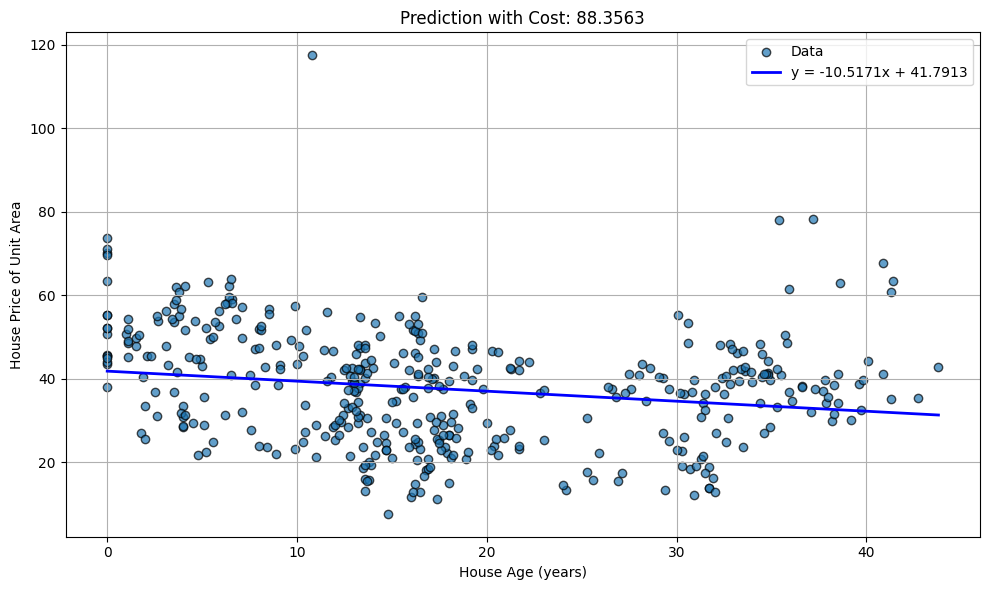

In [21]:
if __name__ == "__main__":
    # Data Processing
    ## Train on processed data and test on actual data
    train_data = pd.read_csv("RealEstate.csv")
    test_data = pd.read_csv("RealEstate_old.csv")
    
    x_train_total = train_data['X2.house.age'].to_numpy()
    y_train_total = train_data['Y.house.price.of.unit.area'].to_numpy()

    x_test_total = test_data['X2 house age'].to_numpy()
    y_test_total = test_data['Y house price of unit area'].to_numpy()


    # Normalization
    scaling = lambda x: (x - x.min()) / (x.max() - x.min())

    x_train = scaling(x_train_total).astype(np.float64)
    x_test = scaling(x_test_total).astype(np.float64)
    y_train = y_train_total.astype(np.float64)
    y_test = y_test_total.astype(np.float64)

    lr = 0.1
    n_iters = 500
    predict(lr, n_iters, x_train, y_train, x_test, y_test)